# Tracé de rayons : exemple source ponctuelle dans un milieu homogène ou hétérogène

Ce TP a pour but d'illustrer la résolution d'un problème de propagation d'ondes acoustiques à grande distance par la méthode des rayons

In [22]:
# on étend les fonctionnalités de base de python, en ajoutant les bibliothèques suivantes :
%matplotlib inline
import numpy as np
import pylab as plt
import sys
import sympy as sym
from ipywidgets import interact

In [23]:
# on importe aussi le programme qui gère le tracé de rayons
import Raypy as ray

## Définition de la vitesse du son

In [32]:
def SoundSpeed():
    x, y, z = sym.symbols('x y z')
    #==========================
    #Possibilité d'utilisation de piecewise: pour les profils définis par morceaux
    #sym.Piecewise((1, And(x <= 1, x >= 0)), (0, True))
    # Vitesse du son a definir ici
    C0 = 340  - 0 * x + 0 *  y + 0 * z 
    
    #==========================
    # NE PAS MODIFIER CETTE PARTIE
    c0, dc0dx, dc0dy, dc0dz = ray.Sym2fct_c(C0)
    return c0, dc0dx, dc0dy, dc0dz

## Définition des écoulements

In [33]:
def Flows():
    x, y, z = sym.symbols('x y z')
    #==========================
    # Vitesse de l'écoulement a definir ici
    Ux = 0 + 0 * x + 0 * y + 0 * z
    Uy = 0 + 0 * x + 0 * y + 0 * z
    Uz = 0 + 0 * x + 0 * y + 0 * z

    #==========================
    # NE PAS MODIFIER CETTE PARTIE
    ux, uy, uz, duxdx, duydx, duzdx, duxdy, duydy, duzdy, duxdz, duydz, duzdz = ray.Sym2fct_U(Ux, Uy, Uz)
    return ux, uy, uz, duxdx, duydx, duzdx, duxdy, duydy, duzdy, duxdz, duydz, duzdz

## Définition des frontières du domaine

In [34]:
def MediumIn(x, y):
    if (y <0):
        return -1
    else:
        return 1

## On définit le milieu de propagation à partir du calcul de la vitesse du son et de ses dérivéees, idem pour les écoulements

In [35]:
c0, dc0dx, dc0dy, dc0dz = SoundSpeed()
ux, uy, uz, duxdx, duydx, duzdx, duxdy, duydy, duzdy, duxdz, duydz, duzdz = Flows()
Mil = ray.Medium(c0, dc0dx, dc0dy, dc0dz, 'croissant', ux, uy, uz, duxdx, duydx, duzdx, duxdy, duydy, duzdy, duxdz, duydz,
             duzdz, 'constant')

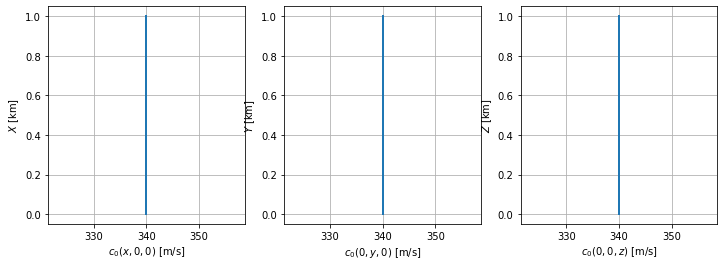

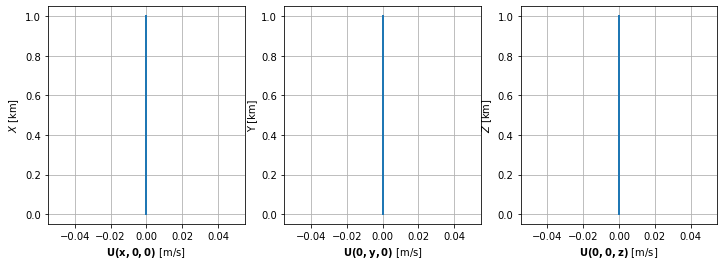

In [36]:
Mil.Plot(1)

## Défintion de la source

Text(0.5, 1.0, 'Normales a $t=0$')

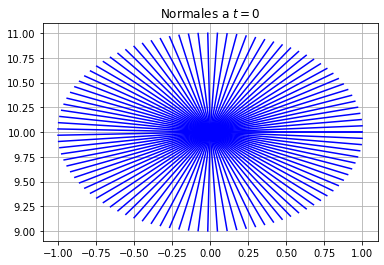

In [39]:
def SourcePonctuelle(NbRay,x0 = 0, y0 = 10):
    """
    permet de définir une source ponctuelle
    
    Input :
    NbRay  [int]  : nombre de rayons émis par la source
    x0     [float]: coordonnees en x de la source
    y0     [float]: coordonnees en y de la source
    
    """
    X = []    # Coordonnées de chaque rayon
    N = []    # Normales de chaque rayon
    alpha = np.linspace(0, 2*np.pi, NbRay)
    for nr in range(NbRay):
        # pour chaque rayon, on defini son origine et sa normale
        X.append(ray.Point(x0, y0, 0))
        N.append(ray.Normal(alpha[nr], alpha[nr]))
    Src = ray.Source(X, N, 'spherique', Tfin=1., Nt=1000)
    return Src
# On trace les normales issues de la source (condition initiale pour chaque rayon)
Src = SourcePonctuelle(NbRay=100)
Src.PlotNormalesSource(NumFig=0, scale=1.0)
plt.title(r'Normales a $t=0$')

## Calcul de la solution 

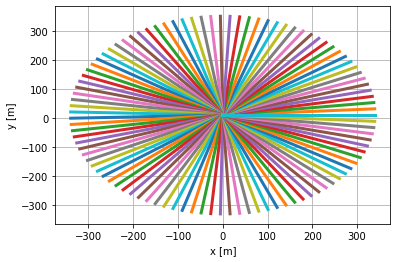

In [38]:
#PROPAGATION EN CHAMP LIBRE 
Src.Propagate(Mil)
#PROPAGATION AVEC UNE FRONTIERE VERTICALE
#Src.PropagateWithAVerticalFront(Mil, 0.154, MediumIn)
#PROPAGATION AVEC UNE FRONTIERE HORIZONTALE
#Src.PropagateWithAHorizontalFront(Mil, 0, MediumIn)
Src.PlotRays(0)